In [51]:
import os

import mysql.connector
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from SQL_Function import read_query

In [52]:
load_dotenv()

user = os.getenv('USER')
password = os.getenv('PASSWORD')
host = os.getenv('HOST')
database = 'swiftMarket'

In [53]:
connection = mysql.connector.connect(user = user,
                                     password = password,
                                     host = host,
                                    database = database )
cursor = connection.cursor()

In [54]:
connection.is_connected()

True

In [55]:
query = '''select * from  salesdata limit 5'''
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row)

(23000, 'C-2023-100-12', 6002, 1100, datetime.date(2023, 5, 2), 2, Decimal('176432.00'))
(23001, 'C-2023-100-141', 6029, 1115, datetime.date(2023, 12, 26), 2, Decimal('47172.00'))
(23002, 'C-2023-100-86', 6029, 1035, datetime.date(2023, 3, 26), 2, Decimal('47172.00'))
(23003, 'C-2023-100-72', 6006, 1016, datetime.date(2023, 8, 1), 2, Decimal('117644.00'))
(23004, 'C-2023-100-142', 6030, 1067, datetime.date(2023, 3, 6), 5, Decimal('336560.00'))


In [56]:
cursor.column_names

('SaleID',
 'CustomerID',
 'SubcatID',
 'EmployeeID',
 'SaleDate',
 'Quantity',
 'TotalPrice')

In [57]:
pd.DataFrame(data=rows,columns= cursor.column_names)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00


In [58]:
query = "Show tables"
read_query (query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [59]:
def read_query(query):
    cursor.execute(query)  # Corrected from 'excute' to 'execute'
    rows = cursor.fetchall()
    return pd.DataFrame(data=rows, columns=cursor.column_names)


In [60]:
query = '''select * from salesdata;'''
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
...,...,...,...,...,...,...,...
11996,34996,C-2023-100-163,6019,1060,2023-06-24,1,14047.00
11997,34997,C-2023-100-66,6023,1065,2023-01-03,5,165670.00
11998,34998,C-2023-100-56,6001,1040,2023-02-12,3,28797.00
11999,34999,C-2023-100-174,6020,1098,2023-07-03,1,68360.00


In [61]:
query = """select monthname(s.saledate) as months,
e.firstname,
sum(s.totalprice)  as total_sales
from salesdata s
join employees e on
e.employeeid=s.employeeid
where monthname(s.saledate)='january'
group by e.firstname , monthname(s.saledate)
order by total_sales desc
limit 10;
"""
df = read_query(query)
df


,months,firstname,total_sales
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
5,January,Yuvaan,3348039.00
6,January,Anika,3152408.00
7,January,Kiaan,3136727.00
8,January,Yasmin,3135779.00
9,January,Hiran,3104523.00


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   months       10 non-null     object
 1   firstname    10 non-null     object
 2   total_sales  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


### Identify the top-performing sales representatives based on their total sales volume


In [63]:
query = """select e.employeeid, e.firstname, e.lastname, SUM(s.TotalPrice) AS total_sales
from employees e
join salesdata s ON e.employeeid = s.employeeid
group BY e.employeeid, e.firstname, e.lastname
order BY total_sales DESC
limit 10;"""

best_performace = read_query(query)
best_performace

,employeeid,firstname,lastname,total_sales
0,1115,Yuvaan,Sidhu,20895341.00
1,1017,Tiya,Hari,19035834.00
2,1029,Shaan,Bhagat,18649467.00
3,1074,Stuvan,Sekhon,18333919.00
4,1001,Fateh,Roy,18231579.00
5,1113,Mannat,Kota,18104646.00
6,1059,Piya,Mall,18054949.00
7,1053,Kiaan,Dora,18049630.00
8,1002,Chirag,Balan,18042772.00
9,1097,Abram,De,17873130.00


In [64]:
Best_performer = best_performace['firstname'].values
Best_performer

array(['Yuvaan', 'Tiya', 'Shaan', 'Stuvan', 'Fateh', 'Mannat', 'Piya',
       'Kiaan', 'Chirag', 'Abram'], dtype=object)

In [65]:

Sales = best_performace['total_sales'].values
Sales

array([Decimal('20895341.00'), Decimal('19035834.00'),
       Decimal('18649467.00'), Decimal('18333919.00'),
       Decimal('18231579.00'), Decimal('18104646.00'),
       Decimal('18054949.00'), Decimal('18049630.00'),
       Decimal('18042772.00'), Decimal('17873130.00')], dtype=object)

In [66]:
best_performace['total_sales'] = best_performace['total_sales'].astype('float')


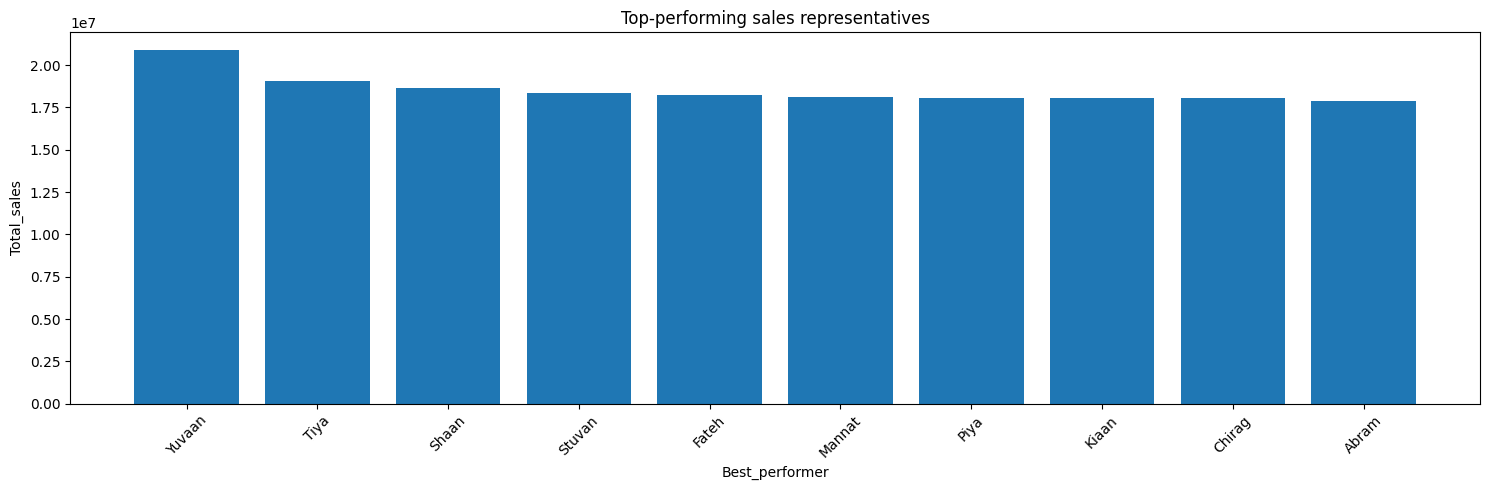

In [67]:

plt.figure(figsize=(15, 5))
plt.bar(Best_performer, Sales)
plt.xlabel('Best_performer')
plt.ylabel('Total_sales')
plt.title('Top-performing sales representatives')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


### What are the total sales made by each employee?

In [68]:
query = '''show tables;'''
read_query(query)


,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [69]:
query = """
select EmployeeID,
sum(TotalPrice) AS TotalSales
from Salesdata
group BY EmployeeID
limit 10;"""

result_df = read_query(query)
result_df

,EmployeeID,TotalSales
0,1001,18231579.00
1,1002,18042772.00
2,1003,16151819.00
3,1004,13648670.00
4,1005,11565845.00
5,1006,15121183.00
6,1007,15135829.00
7,1008,14239241.00
8,1009,13817169.00
9,1010,12706602.00


### Which category has the highest total sales??

In [70]:
query4 = '''
select c.CategoryName , sum(s.TotalPrice)  highest_sales
from subcategories sc
join salesdata s on
sc.SubcatID = s.SubcatID
join categories c on
sc.CategoryID = c.categoryid
group by  c.CategoryName  
order by highest_sales desc;
'''
highest_sales_df = read_query(query4)
highest_sales_df


,CategoryName,highest_sales
0,Pet Supplies and Accessories,361848986.00
1,Health and Wellness Products,324761329.00
2,Electronics and Gadgets,319374417.00
3,Books and Educational Materials,282897933.00
4,Home and Kitchen Appliances,269316684.00
5,Outdoor and Sports Equipment,231074739.00


In [71]:
values = highest_sales_df['highest_sales'].values

labels = highest_sales_df['CategoryName'].values


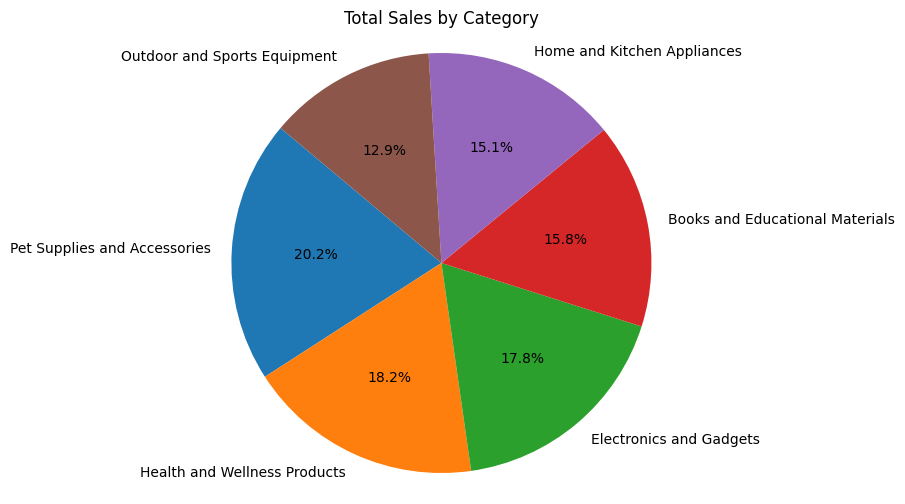

In [74]:
plt.figure(figsize=(9, 6))  # Corrected from 'fifsize' to 'figsize'
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Category')
plt.axis('equal')
plt.show()


### Which category has the highest total sales??

In [78]:
query5 = '''select State,
count(*) AS TotalCustomers
FROM Customers
group BY State
order BY TotalCustomers desc;
'''
NO_count = read_query(query5)
NO_count


,State,TotalCustomers
0,Manipur,14
1,Goa,14
2,Bihar,14
3,Nagaland,11
4,Himachal Pradesh,11
5,Arunachal Pradesh,11
6,Karnataka,11
7,Assam,10
8,Tripura,10
9,Chhattisgarh,10


In [79]:
States = NO_count['State'].values
No_counts = NO_count['TotalCustomers'].values


In [81]:
NO_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           21 non-null     object
 1   TotalCustomers  21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


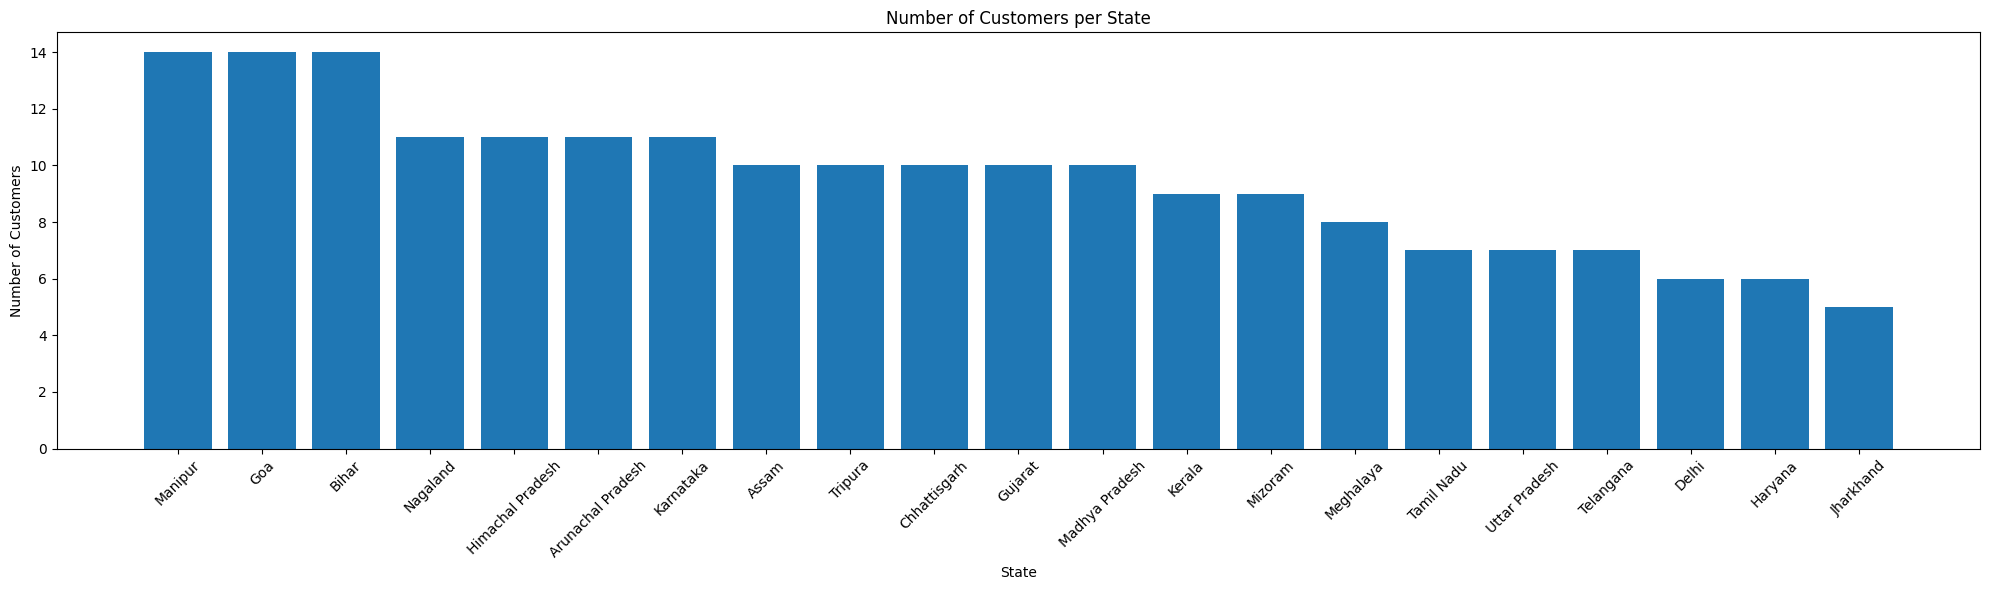

In [82]:
plt.figure(figsize=(20, 6))
plt.bar(States, No_counts)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per State')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


In [83]:
# select * from salesdata;
query6 = '''select  YEAR(saleDate) AS Year, SUM(TotalPrice) AS TotalSales
from salesdata
group BY YEAR(saleDate)
ORDER BY Year;'''

annual_Sale = read_query(query6)
annual_Sale


,Year,TotalSales
0,2023,1789274088.00


### Which supplier has the highest total sales?

In [84]:
query7 = """
select su.suppliername , sum(Totalprice) highest_sales
from salesdata  s
join subcategories sc on
s.subcatid = sc.subcatid
join suppliers su on
su.supplierid = sc.supplierid
group by su.suppliername
order by highest_sales desc;"""


In [85]:
suppliers = read_query(query7)
suppliers   


,suppliername,highest_sales
0,Dora-Aggarwal,180265340.00
1,Agate-Kalita,141629408.00
2,"Sridhar, Sidhu and Maharaj",124268051.00
3,"Sahota, Khurana and Kumar",119604888.00
4,Date-Mander,117152046.00
5,Verma-Vig,112563616.00
6,"Kapur, Acharya and Wadhwa",98842528.00
7,"Sastry, Bali and Deshmukh",86990482.00
8,Mall Group,82034102.00
9,"Khare, Boase and Gole",80254640.00


In [86]:
suplier_name = suppliers['suppliername'].values

Sales = suppliers['highest_sales'].values.reshape(-1,1)


In [87]:
suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   suppliername   22 non-null     object
 1   highest_sales  22 non-null     object
dtypes: object(2)
memory usage: 484.0+ bytes


In [89]:
suppliers['highest_sales'] = suppliers['highest_sales'].astype('float')


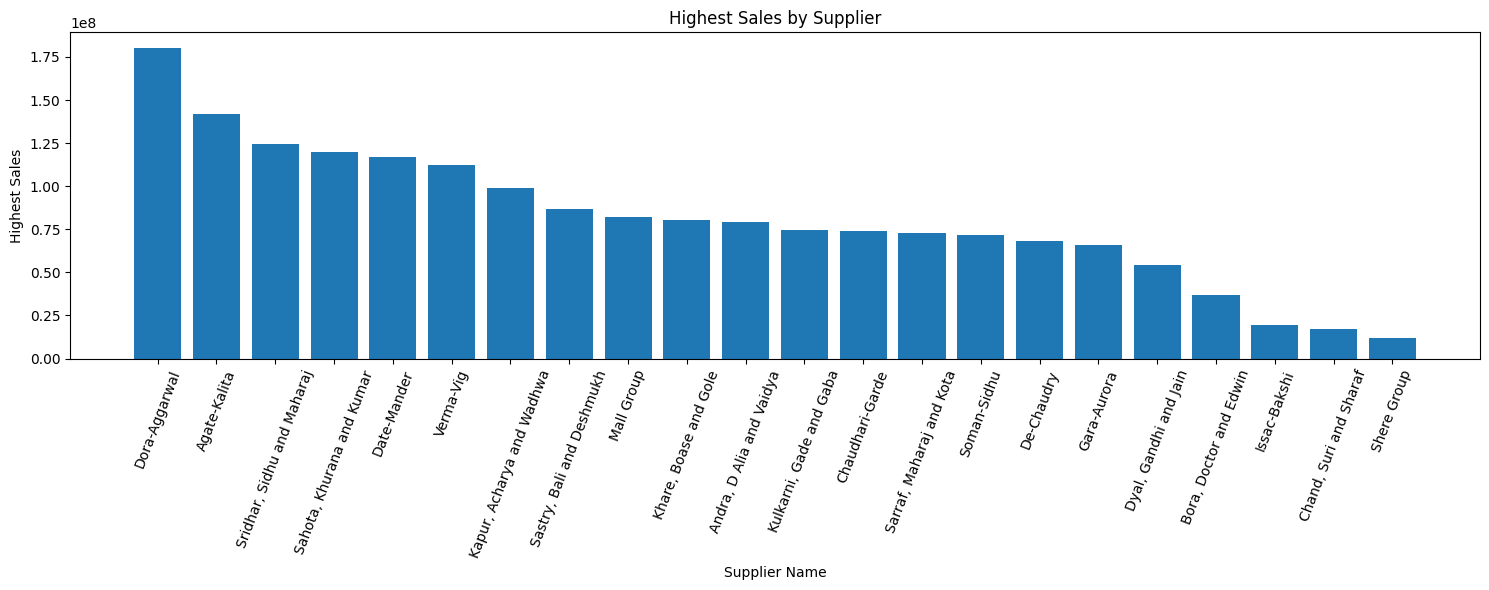

In [90]:
supplier_names = suppliers['suppliername'].values
highest_sales = suppliers['highest_sales'].values

plt.figure(figsize=(15, 6))
plt.bar(supplier_names, highest_sales)
plt.xlabel('Supplier Name')
plt.ylabel('Highest Sales')
plt.title('Highest Sales by Supplier')
plt.xticks(rotation=69)  
plt.tight_layout() 
plt.show()


### How many sales were made by each customer?

In [91]:
query8 = """select s.CustomerID,c.firstname,
count(*) AS TotalSales
from Salesdata s
join customers c
on s.CustomerID=c.CustomerID
group BY s.CustomerID,c.firstname
order by TotalSales desc;"""

df = read_query(query8)
df.head(10)


,CustomerID,firstname,TotalSales
0,C-2023-100-13,Veer,85
1,C-2023-100-130,Amira,81
2,C-2023-100-197,Yuvraj,81
3,C-2023-100-88,Dhruv,78
4,C-2023-100-57,Riya,77
5,C-2023-100-36,Romil,75
6,C-2023-100-75,Prerak,75
7,C-2023-100-101,Shray,74
8,C-2023-100-14,Tiya,73
9,C-2023-100-42,Divyansh,73


### What is the total revenue generated from sales in each state?

In [92]:
query9 = """select
c.State,
SUM(s.TotalPrice) AS Total_Revenue
from Salesdata s
JOIN Customers c ON s.CustomerID = c.CustomerID
group  BY c.State;"""

revenue_sates = read_query(query9)
revenue_sates

,State,Total_Revenue
0,Assam,91371978.00
1,Tripura,92329290.00
2,Nagaland,91511008.00
3,Manipur,122908203.00
4,Kerala,84668321.00
5,Delhi,53744487.00
6,Mizoram,76073281.00
7,Haryana,51660214.00
8,Chhattisgarh,91546717.00
9,Himachal Pradesh,102905140.00


In [93]:
States = revenue_sates['State'].values

revenue = revenue_sates['Total_Revenue'].values


In [94]:
revenue_sates['Total_Revenue'] = revenue_sates['Total_Revenue'].astype('float')


In [95]:
revenue_sates['Total_Revenue'].values


array([9.13719780e+07, 9.23292900e+07, 9.15110080e+07, 1.22908203e+08,
       8.46683210e+07, 5.37444870e+07, 7.60732810e+07, 5.16602140e+07,
       9.15467170e+07, 1.02905140e+08, 6.49903420e+07, 1.26990041e+08,
       6.54327590e+07, 9.73400330e+07, 6.01767230e+07, 9.96713860e+07,
       9.16244250e+07, 1.26103984e+08, 6.27428740e+07, 9.18591710e+07,
       4.36237110e+07])

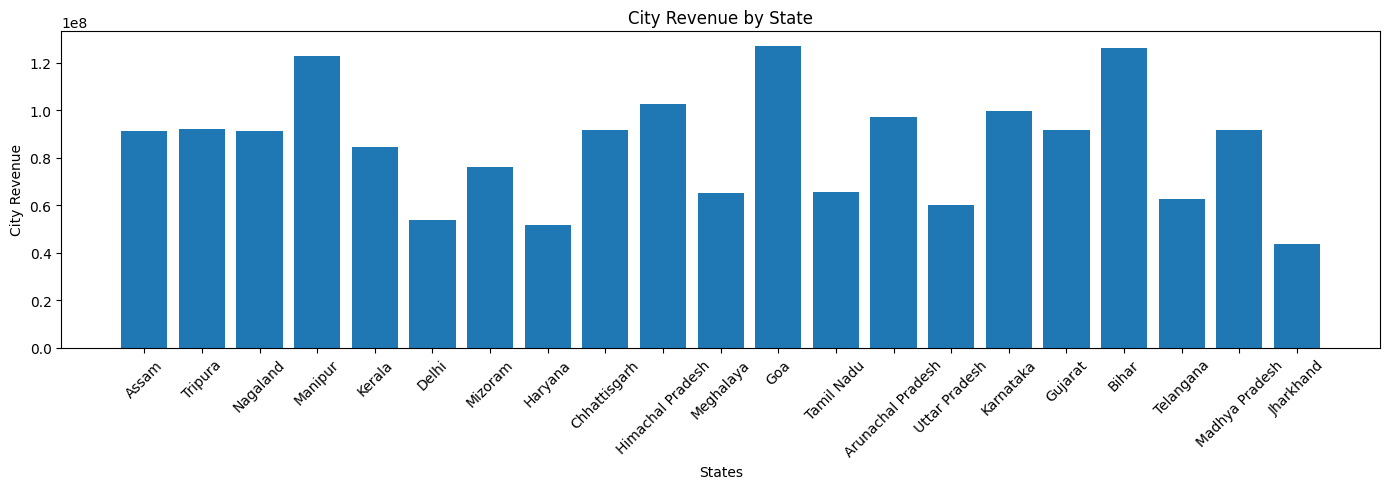

In [96]:
plt.figure(figsize=(14,5))
plt.bar(States, revenue)
plt.xlabel('States')
plt.ylabel('City Revenue')
plt.title('City Revenue by State')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


### What is the total revenue generated from sales in each category?

In [97]:
query10 = """select c.categoryname, sum(s.TotalPrice) as Total_revenue
from salesdata s
join subcategories sc on
s.subcatid = sc.subcatid
join categories c on
c.categoryid = sc.categoryid
group by c.categoryname
order by Total_revenue desc;"""

rev = read_query(query10)
rev


,categoryname,Total_revenue
0,Pet Supplies and Accessories,361848986.00
1,Health and Wellness Products,324761329.00
2,Electronics and Gadgets,319374417.00
3,Books and Educational Materials,282897933.00
4,Home and Kitchen Appliances,269316684.00
5,Outdoor and Sports Equipment,231074739.00


In [98]:
query15 = """select months, avg(monthlysales) OVER (order BY month_name ROWS BETWEEN 3
PRECEDING AND CURRENT ROW) AS Moving_avg
from
(SELECT
month(saledate) month_name,
monthname(SaleDate) as months,
sum(totalprice) as monthlysales
from Salesdata
Group by month(saledate),monthname(saledate)) e"""

moving_avg = read_query(query15)
moving_avg


,months,Moving_avg
0,January,155340130.000000
1,February,147842659.500000
2,March,149099290.000000
3,April,149497368.500000
4,May,151595866.000000
5,June,152391913.500000
6,July,151941736.500000
7,August,153888109.000000
8,September,149640559.000000
9,October,149630423.500000
